In [179]:
#importing necessary libraries
import numpy as np
import pandas as pd
import ast
import nltk
import os
import warnings
import random
import sklearn
import math
import matplotlib.pyplot as plt

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
warnings.filterwarnings('ignore')
%matplotlib inline

In [180]:
#mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
#reading dataset csv files 
mv = pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/movies.csv')
df = pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/credits.csv')
rat = pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/rating.csv',index_col=False)
mov= pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/movies2.csv',index_col=False)
lin=pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/rat-link.csv',index_col=False)
mvc=pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/colabfil_mv_name.csv',index_col=False)

In [182]:
#merging movies and credits based on movie_id
mv_1=mv.merge(df,on='movie_id')

In [183]:
#reading the merged dataset csv by downloading the merged dataset to a csv file 
mv1=pd.read_csv('/content/drive/MyDrive/recommendation system/datasets/movie_merge_id.csv')

In [184]:
#displaying Movie dataset
mv

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",english,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",english,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",english,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",english,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",english,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",english,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-09-1995,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,6.0,1
4152,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",english,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",08-10-2004,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What happens if it actually works?,Primer,6.9,658
4153,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u

In [185]:
#Displaying first movie attributes from dataset
mv.head(1)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",english,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [186]:
#displaying Credit dataset
df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4797,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4798,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4799,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4800,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [187]:
#Displaying first movies credit attributes from dataset
df.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [188]:
#Displaying first movie attributes from dataset after merging
mv1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title.1,cast,crew
0,3000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.tsotsimovie.com/,868,"[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na...",af,Tsotsi,The South African multi-award winning film abo...,2.504169,"[{""name"": ""Movieworld Productions"", ""id"": 563}...",...,94,"[{""iso_639_1"": ""af"", ""name"": ""Afrikaans""}, {""i...",Released,In this world... Redemption comes just once.,Tsotsi,6.9,94,Tsotsi,"[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de..."
1,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://www.bacfilms.com/site/caramel/,7973,"[{""id"": 515, ""name"": ""women""}, {""id"": 928, ""na...",ar,Caramel,In a beauty salon in Beirut the lives of five ...,4.554574,"[{""name"": ""Bac Films"", ""id"": 208}, {""name"": ""L...",...,96,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Caramel,6.8,52,Caramel,"[{""cast_id"": 9, ""character"": ""Layale"", ""credit...","[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de..."
2,0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...",http://www.thesquarefilm.com/,159037,"[{""id"": 187056, ""name"": ""woman director""}]",ar,The Square,"The Square, a new film by Jehane Noujaim (Cont...",4.892203,"[{""name"": ""Roast Beef Productions"", ""id"": 7266...",...,88,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,What does it mean to risk your life for your i...,The Square,7.8,55,The Square,"[{""cast_id"": 15, ""character"": ""Himself"", ""cred...","[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de..."
3,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,13688,"[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97...",cn,CJ7,"Ti, a really poor construction worker that str...",12.373248,"[{""name"": ""Columbia Pictures Film Production A...",...,86,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,It's out of this world.,CJ7,6.1,107,CJ7,"[{""cast_id"": 1, ""character"": ""Ti Chow"", ""credi...","[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de..."
4,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,12207,"[{""id"": 494, ""name"": ""father son relationship""...",cn,Drunken Master II,Returning home with his father after a shoppin...,15.046612,"[{""name"": ""Paragon Films Ltd."", ""id"": 3055}, {...",...,102,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,He's got a secret weapon with a lot of kick.,The Legend of Drunken Master,7.2,242,The Legend of Drunken Master,"[{""cast_id"": 10, ""character"": ""Wong Fei-hung"",...","[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de..."


In [189]:
#Displaying the merged datset attribute info
mv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4375 non-null   int64  
 1   genres                4375 non-null   object 
 2   homepage              1615 non-null   object 
 3   id                    4375 non-null   int64  
 4   keywords              4375 non-null   object 
 5   original_language     4375 non-null   object 
 6   original_title        4375 non-null   object 
 7   overview              4375 non-null   object 
 8   popularity            4375 non-null   float64
 9   production_companies  4179 non-null   object 
 10  production_countries  4301 non-null   object 
 11  release_date          4375 non-null   object 
 12  revenue               4375 non-null   int64  
 13  runtime               4375 non-null   int64  
 14  spoken_languages      4349 non-null   object 
 15  status               

In [190]:
#Required Attributes
#genre, id, title, orginal_language, release_date, cast, overview, crew, keywords

In [191]:
mv1.head(1)
mv1['original_language'].value_counts()

en    4120
fr      61
es      29
de      22
zh      21
hi      14
ja      13
it      11
ko      11
ru       9
cn       9
pt       8
da       7
sv       5
nl       4
fa       3
th       3
ta       2
ar       2
cs       2
id       2
he       2
tr       1
vi       1
te       1
xx       1
sl       1
pl       1
ro       1
ps       1
el       1
no       1
nb       1
ky       1
is       1
hu       1
af       1
Name: original_language, dtype: int64

In [192]:
mv1.isnull().sum()

budget                     0
genres                     0
homepage                2760
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies     196
production_countries      74
release_date               0
revenue                    0
runtime                    0
spoken_languages          26
status                     0
tagline                  618
title                      0
vote_average               0
vote_count                 0
title.1                    0
cast                       0
crew                       0
dtype: int64

In [193]:
#renaming attribute names
mv1.rename(columns = {'id':'movie_id'}, inplace = True)
mv1.rename(columns = {'title':'Title'}, inplace = True)
mv1.rename(columns = {'original_title':'title'}, inplace = True)
mv1

,budget,genres,homepage,movie_id,keywords,original_language,title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,Title,vote_average,vote_count,title.1,cast,crew
0,3000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.tsotsimovie.com/,868,"[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na...",af,Tsotsi,The South African multi-award winning film abo...,2.504169,"[{""name"": ""Movieworld Productions"", ""id"": 563}...",...,94,"[{""iso_639_1"": ""af"", ""name"": ""Afrikaans""}, {""i...",Released,In this world... Redemption comes just once.,Tsotsi,6.9,94,Tsotsi,"[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de..."
1,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://www.bacfilms.com/site/caramel/,7973,"[{""id"": 515, ""name"": ""women""}, {""id"": 928, ""na...",ar,Caramel,In a beauty salon in Beirut the lives of five ...,4.554574,"[{""name"": ""Bac Films"", ""id"": 208}, {""name"": ""L...",...,96,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Caramel,6.8,52,Caramel,"[{""cast_id"": 9, ""character"": ""Layale"", ""credit...","[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de..."
2,0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...",http://www.thesquarefilm.com/,159037,"[{""id"": 187056, ""name"": ""woman director""}]",ar,The Square,"The Square, a new film by Jehane Noujaim (Cont...",4.892203,"[{""name"": ""Roast Beef Productions"", ""id"": 7266...",...,88,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,What does it mean to risk your life for your i...,The Square,7.8,55,The Square,"[{""cast_id"": 15, ""character"": ""Himself"", ""cred...","[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de..."
3,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,13688,"[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97...",cn,CJ7,"Ti, a really poor construction worker that str...",12.373248,"[{""name"": ""Columbia Pictures Film Production A...",...,86,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,It's out of this world.,CJ7,6.1,107,CJ7,"[{""cast_id"": 1, ""character"": ""Ti Chow"", ""credi...","[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de..."
4,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,12207,"[{""id"": 494, ""name"": ""father son relationship""...",cn,Drunken Master II,Returning home with his father after a shoppin...,15.046612,"[{""name"": ""Paragon Films Ltd."", ""id"": 3055}, {...",...,102,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,He's got a secret weapon with a lot of kick.,The Legend of Drunken Master,7.2,242,The Legend of Drunken Master,"[{""cast_id"": 10, ""character"": ""Wong Fei-hung"",...","[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",NaN,358451,"[{""id"": 187056, ""name"": ""woman director""}]",zh,A Tale of Three Cities,A former spy in the Chinese Nationalist Party ...,0.753362,"[{""name"": ""Huayi Brothers"", ""id"": 3393}, {""nam...",...,130,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,A Tale of Three Cities,6.3,5,A Tale of Three Cities,"[{""cast_id"": 0, ""character"": ""Fang Daolong"", ""...","[{""credit_id"": ""57e7b357925141390b01049a"", ""de..."
4371,3860000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,44865,"[{""id"": 779, ""name"": ""martial arts""}, {""id"": 7...",zh,The Grandmaster,Ip Man's peaceful life in Foshan changes after...,19.947265,"[{""name"": ""The Weinstein Company"", ""id"": 308},...",...,130,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,"In Martial Arts there is no right or wrong, on...",The Grandmaster,6.3,273,The Grandmaster,"[{""cast_id"": 3, ""character"": ""Ip Man"", ""credit

In [194]:
mv2=mv1[['movie_id','title','overview','genres','keywords','cast','crew','original_language','release_date']]
#mv2 contains the required dataset
mv2

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,The South African multi-award winning film abo...,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na...","[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de...",af,2005-08-18
1,7973,Caramel,In a beauty salon in Beirut the lives of five ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 515, ""name"": ""women""}, {""id"": 928, ""na...","[{""cast_id"": 9, ""character"": ""Layale"", ""credit...","[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de...",ar,2007-07-01
2,159037,The Square,"The Square, a new film by Jehane Noujaim (Cont...","[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...","[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 15, ""character"": ""Himself"", ""cred...","[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de...",ar,2013-06-07
3,13688,CJ7,"Ti, a really poor construction worker that str...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97...","[{""cast_id"": 1, ""character"": ""Ti Chow"", ""credi...","[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de...",cn,2008-01-30
4,12207,Drunken Master II,Returning home with his father after a shoppin...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...","[{""id"": 494, ""name"": ""father son relationship""...","[{""cast_id"": 10, ""character"": ""Wong Fei-hung"",...","[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de...",cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,A former spy in the Chinese Nationalist Party ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 0, ""character"": ""Fang Daolong"", ""...","[{""credit_id"": ""57e7b357925141390b01049a"", ""de...",zh,2015-08-28
4371,44865,The Grandmaster,Ip Man's peaceful life in Foshan changes after...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 779, ""name"": ""martial arts""}, {""id"": 7...","[{""cast_id"": 3, ""character"": ""Ip Man"", ""credit...","[{""credit_id"": ""52fe469fc3a36847f8109283"", ""de...",zh,2013-01-08
4372,2008,Wu Ji,"An orphaned girl, driven by poverty at such a ...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 964, ""name"": ""servant""}, {""id"": 2280, ...","[{""cast_id"": 13, ""character"": ""Princess Qingch...","[{""credit_id"": ""52fe432bc3a36847f803fb19"", ""de...",zh,2005-12-15
4373,12289,Chi bi,"In the early third century, the land of Wu is ...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 158145, ""name"": ""flaming arrow""}, {""id...","[{""cast_id"": 2, ""character"": ""Sun Quan"", ""cred...","[{""credit_id"": ""52fe44da9251416c750432cd"", ""de...",zh,2008-07-10


In [195]:
mv2.to_csv('preprocdata.csv',header=True,index=False)

In [196]:
mv2.isnull().sum()

movie_id             0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
release_date         0
dtype: int64

In [197]:
mv2.isnull().sum()

movie_id             0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
release_date         0
dtype: int64

In [198]:
mv2.dropna(inplace=True)

In [199]:
mv2.duplicated().sum()

0

In [200]:
mv2

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,The South African multi-award winning film abo...,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na...","[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de...",af,2005-08-18
1,7973,Caramel,In a beauty salon in Beirut the lives of five ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 515, ""name"": ""women""}, {""id"": 928, ""na...","[{""cast_id"": 9, ""character"": ""Layale"", ""credit...","[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de...",ar,2007-07-01
2,159037,The Square,"The Square, a new film by Jehane Noujaim (Cont...","[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...","[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 15, ""character"": ""Himself"", ""cred...","[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de...",ar,2013-06-07
3,13688,CJ7,"Ti, a really poor construction worker that str...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97...","[{""cast_id"": 1, ""character"": ""Ti Chow"", ""credi...","[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de...",cn,2008-01-30
4,12207,Drunken Master II,Returning home with his father after a shoppin...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...","[{""id"": 494, ""name"": ""father son relationship""...","[{""cast_id"": 10, ""character"": ""Wong Fei-hung"",...","[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de...",cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,A former spy in the Chinese Nationalist Party ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 0, ""character"": ""Fang Daolong"", ""...","[{""credit_id"": ""57e7b357925141390b01049a"", ""de...",zh,2015-08-28
4371,44865,The Grandmaster,Ip Man's peaceful life in Foshan changes after...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 779, ""name"": ""martial arts""}, {""id"": 7...","[{""cast_id"": 3, ""character"": ""Ip Man"", ""credit...","[{""credit_id"": ""52fe469fc3a36847f8109283"", ""de...",zh,2013-01-08
4372,2008,Wu Ji,"An orphaned girl, driven by poverty at such a ...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 964, ""name"": ""servant""}, {""id"": 2280, ...","[{""cast_id"": 13, ""character"": ""Princess Qingch...","[{""credit_id"": ""52fe432bc3a36847f803fb19"", ""de...",zh,2005-12-15
4373,12289,Chi bi,"In the early third century, the land of Wu is ...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 158145, ""name"": ""flaming arrow""}, {""id...","[{""cast_id"": 2, ""character"": ""Sun Quan"", ""cred...","[{""credit_id"": ""52fe44da9251416c750432cd"", ""de...",zh,2008-07-10


In [201]:
mv2[['genres','keywords']]

,genres,keywords
0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na..."
1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 515, ""name"": ""women""}, {""id"": 928, ""na..."
2,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...","[{""id"": 187056, ""name"": ""woman director""}]"
3,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...","[{""id"": 494, ""name"": ""father son relationship""..."
...,...,...
4370,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 187056, ""name"": ""woman director""}]"
4371,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 779, ""name"": ""martial arts""}, {""id"": 7..."
4372,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 964, ""name"": ""servant""}, {""id"": 2280, ..."
4373,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 158145, ""name"": ""flaming arrow""}, {""id..."


In [202]:
mv2

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,The South African multi-award winning film abo...,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 100, ""name"": ""slum""}, {""id"": 1009, ""na...","[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de...",af,2005-08-18
1,7973,Caramel,In a beauty salon in Beirut the lives of five ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 515, ""name"": ""women""}, {""id"": 928, ""na...","[{""cast_id"": 9, ""character"": ""Layale"", ""credit...","[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de...",ar,2007-07-01
2,159037,The Square,"The Square, a new film by Jehane Noujaim (Cont...","[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...","[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 15, ""character"": ""Himself"", ""cred...","[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de...",ar,2013-06-07
3,13688,CJ7,"Ti, a really poor construction worker that str...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97...","[{""cast_id"": 1, ""character"": ""Ti Chow"", ""credi...","[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de...",cn,2008-01-30
4,12207,Drunken Master II,Returning home with his father after a shoppin...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...","[{""id"": 494, ""name"": ""father son relationship""...","[{""cast_id"": 10, ""character"": ""Wong Fei-hung"",...","[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de...",cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,A former spy in the Chinese Nationalist Party ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 0, ""character"": ""Fang Daolong"", ""...","[{""credit_id"": ""57e7b357925141390b01049a"", ""de...",zh,2015-08-28
4371,44865,The Grandmaster,Ip Man's peaceful life in Foshan changes after...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 779, ""name"": ""martial arts""}, {""id"": 7...","[{""cast_id"": 3, ""character"": ""Ip Man"", ""credit...","[{""credit_id"": ""52fe469fc3a36847f8109283"", ""de...",zh,2013-01-08
4372,2008,Wu Ji,"An orphaned girl, driven by poverty at such a ...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 964, ""name"": ""servant""}, {""id"": 2280, ...","[{""cast_id"": 13, ""character"": ""Princess Qingch...","[{""credit_id"": ""52fe432bc3a36847f803fb19"", ""de...",zh,2005-12-15
4373,12289,Chi bi,"In the early third century, the land of Wu is ...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 158145, ""name"": ""flaming arrow""}, {""id...","[{""cast_id"": 2, ""character"": ""Sun Quan"", ""cred...","[{""credit_id"": ""52fe44da9251416c750432cd"", ""de...",zh,2008-07-10


In [203]:
#Genres : Action, Adventure, Fantansy.....
#Keywords : Spy, Ocean, Based on novel, Obsession.....

In [204]:
#filter function for genres and keywords
def convert(obj):
  L=[]
  for i in ast.literal_eval(obj):
    L.append(i['name'])
  return L

In [205]:
#Filter Function call for genres and keywords
mv2['genres']=mv2['genres'].apply(convert)
mv2['keywords']=mv2['keywords'].apply(convert)

In [206]:
#After filtering out genres
mv2[['genres','keywords']]

,genres,keywords
0,"[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu..."
1,"[Drama, Comedy, Romance]","[women, hairdresser, sister sister relationshi..."
2,"[Documentary, Drama, History]",[woman director]
3,"[Comedy, Drama, Family, Fantasy, Science Fiction]","[little boy, ufo, extraterrestrial]"
4,"[Action, Comedy]","[father son relationship, martial arts, showdo..."
...,...,...
4370,"[Drama, History, Romance]",[woman director]
4371,"[Action, Drama, History]","[martial arts, kung fu, biography, kung fu mas..."
4372,"[Fantasy, Drama, Action, Thriller, Romance]","[servant, emperor, battle assignment]"
4373,"[Adventure, Drama, Action]","[flaming arrow, chinese history, strategy, car..."


In [29]:
#Displaying first movie cast details
mv2['cast'][0]

'[{"cast_id": 14, "character": "Tsotsi", "credit_id": "52fe4285c3a36847f8025481", "gender": 2, "id": 13091, "name": "Presley Chweneyagae", "order": 0}, {"cast_id": 15, "character": "Morris", "credit_id": "52fe4285c3a36847f8025485", "gender": 2, "id": 13092, "name": "Jerry Mofokeng", "order": 1}, {"cast_id": 16, "character": "Miriam", "credit_id": "52fe4285c3a36847f8025489", "gender": 1, "id": 13093, "name": "Terry Pheto", "order": 2}, {"cast_id": 17, "character": "Aap", "credit_id": "52fe4285c3a36847f802548d", "gender": 2, "id": 13094, "name": "Kenneth Nkosi", "order": 3}, {"cast_id": 18, "character": "Butcher", "credit_id": "52fe4285c3a36847f8025491", "gender": 0, "id": 13095, "name": "Zenzo Ngqobe", "order": 4}, {"cast_id": 19, "character": "Fela", "credit_id": "52fe4285c3a36847f8025495", "gender": 0, "id": 13097, "name": "Zola", "order": 5}, {"cast_id": 20, "character": "John Dube", "credit_id": "52fe4285c3a36847f8025499", "gender": 2, "id": 13098, "name": "Rapulana Seiphemo", "orde

In [30]:
mv2[['cast']]

,cast
0,"[{""cast_id"": 14, ""character"": ""Tsotsi"", ""credi..."
1,"[{""cast_id"": 9, ""character"": ""Layale"", ""credit..."
2,"[{""cast_id"": 15, ""character"": ""Himself"", ""cred..."
3,"[{""cast_id"": 1, ""character"": ""Ti Chow"", ""credi..."
4,"[{""cast_id"": 10, ""character"": ""Wong Fei-hung"",..."
...,...
4370,"[{""cast_id"": 0, ""character"": ""Fang Daolong"", ""..."
4371,"[{""cast_id"": 3, ""character"": ""Ip Man"", ""credit..."
4372,"[{""cast_id"": 13, ""character"": ""Princess Qingch..."
4373,"[{""cast_id"": 2, ""character"": ""Sun Quan"", ""cred..."


In [31]:
mv2[['crew']]

,crew
0,"[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de..."
1,"[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de..."
2,"[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de..."
3,"[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de..."
4,"[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de..."
...,...
4370,"[{""credit_id"": ""57e7b357925141390b01049a"", ""de..."
4371,"[{""credit_id"": ""52fe469fc3a36847f8109283"", ""de..."
4372,"[{""credit_id"": ""52fe432bc3a36847f803fb19"", ""de..."
4373,"[{""credit_id"": ""52fe44da9251416c750432cd"", ""de..."


In [32]:
#filtering out first 3 cast names
def convert3(obj):
  L=[]
  counter=0
  for i in ast.literal_eval(obj):
    if counter!=3:
      L.append(i['name'])
      counter+=1
    else:
      break
  return L

In [33]:
mv2['cast']=mv2['cast'].apply(convert3)
#After filtering cast
mv2.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,The South African multi-award winning film abo...,"[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[Presley Chweneyagae, Jerry Mofokeng, Terry Ph...","[{""credit_id"": ""52fe4285c3a36847f802545f"", ""de...",af,2005-08-18
1,7973,Caramel,In a beauty salon in Beirut the lives of five ...,"[Drama, Comedy, Romance]","[women, hairdresser, sister sister relationshi...","[Nadine Labaki, Yasmine Al Massri, Joanna Mouk...","[{""credit_id"": ""577f4c2fc3a3687941001c8f"", ""de...",ar,2007-07-01
2,159037,The Square,"The Square, a new film by Jehane Noujaim (Cont...","[Documentary, Drama, History]",[woman director],"[Khalid Abdalla, Dina Abdullah, Dina Amer]","[{""credit_id"": ""52fe4c019251416c910ec7df"", ""de...",ar,2013-06-07
3,13688,CJ7,"Ti, a really poor construction worker that str...","[Comedy, Drama, Family, Fantasy, Science Fiction]","[little boy, ufo, extraterrestrial]","[Stephen Chow, Xu Jiao, Kitty Zhang Yuqi]","[{""credit_id"": ""5747bbbe92514135c9000db9"", ""de...",cn,2008-01-30
4,12207,Drunken Master II,Returning home with his father after a shoppin...,"[Action, Comedy]","[father son relationship, martial arts, showdo...","[Jackie Chan, Anita Mui, Ti Lung]","[{""credit_id"": ""52fe44c99251416c75040f7d"", ""de...",cn,1994-02-03


In [34]:
mv2['cast'][0]

['Presley Chweneyagae', 'Jerry Mofokeng', 'Terry Pheto']

In [35]:
mv2['crew'][0]

'[{"credit_id": "52fe4285c3a36847f802545f", "department": "Production", "gender": 0, "id": 2623, "job": "Casting", "name": "Moonyeenn Lee"}, {"credit_id": "52fe4285c3a36847f80254bf", "department": "Writing", "gender": 2, "id": 11860, "job": "Novel", "name": "Athol Fugard"}, {"credit_id": "52fe4285c3a36847f802543b", "department": "Directing", "gender": 2, "id": 13079, "job": "Director", "name": "Gavin Hood"}, {"credit_id": "53669c520e0a2647d4003a6f", "department": "Writing", "gender": 2, "id": 13079, "job": "Writer", "name": "Gavin Hood"}, {"credit_id": "52fe4285c3a36847f8025441", "department": "Production", "gender": 2, "id": 13081, "job": "Producer", "name": "Peter Fudakowski"}, {"credit_id": "52fe4285c3a36847f8025447", "department": "Sound", "gender": 2, "id": 13082, "job": "Original Music Composer", "name": "Paul Hepker"}, {"credit_id": "52fe4285c3a36847f802544d", "department": "Sound", "gender": 2, "id": 13083, "job": "Original Music Composer", "name": "Mark Kilian"}, {"credit_id":

In [36]:
#function to filter director
def fetch_direc(obj):
  L=[]
  for i in ast.literal_eval(obj):
    if i['job']=='Director':
      L.append(i['name'])
      break
  return L

In [37]:
mv2['crew']=mv2['crew'].apply(fetch_direc)
#after filtering out director from crew
mv2.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,The South African multi-award winning film abo...,"[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[Presley Chweneyagae, Jerry Mofokeng, Terry Ph...",[Gavin Hood],af,2005-08-18
1,7973,Caramel,In a beauty salon in Beirut the lives of five ...,"[Drama, Comedy, Romance]","[women, hairdresser, sister sister relationshi...","[Nadine Labaki, Yasmine Al Massri, Joanna Mouk...",[Nadine Labaki],ar,2007-07-01
2,159037,The Square,"The Square, a new film by Jehane Noujaim (Cont...","[Documentary, Drama, History]",[woman director],"[Khalid Abdalla, Dina Abdullah, Dina Amer]",[Jehane Noujaim],ar,2013-06-07
3,13688,CJ7,"Ti, a really poor construction worker that str...","[Comedy, Drama, Family, Fantasy, Science Fiction]","[little boy, ufo, extraterrestrial]","[Stephen Chow, Xu Jiao, Kitty Zhang Yuqi]",[Stephen Chow],cn,2008-01-30
4,12207,Drunken Master II,Returning home with his father after a shoppin...,"[Action, Comedy]","[father son relationship, martial arts, showdo...","[Jackie Chan, Anita Mui, Ti Lung]",[Liu Chia-Liang],cn,1994-02-03


In [38]:
mv2['overview'][0]

'The South African multi-award winning film about a young South African boy from the ghetto named Tsotsi, meaning Gangster. Tsotsi, who left home as a child to get away from helpless parents, finds a baby in the back seat of a car that he has just stolen. He decides that it his responsibility to take care of the baby and in the process learns that maybe the gangster life isn’t the best way.'

In [39]:
#Splitting overview into collection of words
mv2['overview']=mv2['overview'].apply(lambda x:x.split())
mv2.head()


,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[Presley Chweneyagae, Jerry Mofokeng, Terry Ph...",[Gavin Hood],af,2005-08-18
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,...","[Drama, Comedy, Romance]","[women, hairdresser, sister sister relationshi...","[Nadine Labaki, Yasmine Al Massri, Joanna Mouk...",[Nadine Labaki],ar,2007-07-01
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja...","[Documentary, Drama, History]",[woman director],"[Khalid Abdalla, Dina Abdullah, Dina Amer]",[Jehane Noujaim],ar,2013-06-07
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t...","[Comedy, Drama, Family, Fantasy, Science Fiction]","[little boy, ufo, extraterrestrial]","[Stephen Chow, Xu Jiao, Kitty Zhang Yuqi]",[Stephen Chow],cn,2008-01-30
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,...","[Action, Comedy]","[father son relationship, martial arts, showdo...","[Jackie Chan, Anita Mui, Ti Lung]",[Liu Chia-Liang],cn,1994-02-03


In [40]:
#Removing spaces in genres, keywords, cast and crew
mv2['genres']=mv2['genres'].apply(lambda x:[i.replace(" ","") for i in x])
mv2['keywords']=mv2['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
mv2['cast']=mv2['cast'].apply(lambda x:[i.replace(" ","") for i in x])
mv2['crew']=mv2['crew'].apply(lambda x:[i.replace(" ","") for i in x])
mv2.head()


,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[PresleyChweneyagae, JerryMofokeng, TerryPheto]",[GavinHood],af,2005-08-18
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,...","[Drama, Comedy, Romance]","[women, hairdresser, sistersisterrelationship,...","[NadineLabaki, YasmineAlMassri, JoannaMoukarzel]",[NadineLabaki],ar,2007-07-01
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja...","[Documentary, Drama, History]",[womandirector],"[KhalidAbdalla, DinaAbdullah, DinaAmer]",[JehaneNoujaim],ar,2013-06-07
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t...","[Comedy, Drama, Family, Fantasy, ScienceFiction]","[littleboy, ufo, extraterrestrial]","[StephenChow, XuJiao, KittyZhangYuqi]",[StephenChow],cn,2008-01-30
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,...","[Action, Comedy]","[fathersonrelationship, martialarts, showdown,...","[JackieChan, AnitaMui, TiLung]",[LiuChia-Liang],cn,1994-02-03


In [41]:
mv2

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[PresleyChweneyagae, JerryMofokeng, TerryPheto]",[GavinHood],af,2005-08-18
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,...","[Drama, Comedy, Romance]","[women, hairdresser, sistersisterrelationship,...","[NadineLabaki, YasmineAlMassri, JoannaMoukarzel]",[NadineLabaki],ar,2007-07-01
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja...","[Documentary, Drama, History]",[womandirector],"[KhalidAbdalla, DinaAbdullah, DinaAmer]",[JehaneNoujaim],ar,2013-06-07
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t...","[Comedy, Drama, Family, Fantasy, ScienceFiction]","[littleboy, ufo, extraterrestrial]","[StephenChow, XuJiao, KittyZhangYuqi]",[StephenChow],cn,2008-01-30
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,...","[Action, Comedy]","[fathersonrelationship, martialarts, showdown,...","[JackieChan, AnitaMui, TiLung]",[LiuChia-Liang],cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,"[A, former, spy, in, the, Chinese, Nationalist...","[Drama, History, Romance]",[womandirector],"[LauChing-Wan, TangWei, QinHailu]",[MabelCheung],zh,2015-08-28
4371,44865,The Grandmaster,"[Ip, Man's, peaceful, life, in, Foshan, change...","[Action, Drama, History]","[martialarts, kungfu, biography, kungfumaster]","[TonyLeungChiu-Wai, ZhangZiyi, SongHye-kyo]",[WongKar-wai],zh,2013-01-08
4372,2008,Wu Ji,"[An, orphaned, girl,, driven, by, poverty, at,...","[Fantasy, Drama, Action, Thriller, Romance]","[servant, emperor, battleassignment]","[CeciliaCheung, LiuYe, HongChen]",[ChenKaige],zh,2005-12-15
4373,12289,Chi bi,"[In, the, early, third, century,, the, land, o...","[Adventure, Drama, Action]","[flamingarrow, chinesehistory, strategy, carri...","[ChangChen, HuJun, TonyLeungChiu-Wai]",[JohnWoo],zh,2008-07-10


In [42]:
mv3=mv2

In [43]:
mv3


,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[PresleyChweneyagae, JerryMofokeng, TerryPheto]",[GavinHood],af,2005-08-18
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,...","[Drama, Comedy, Romance]","[women, hairdresser, sistersisterrelationship,...","[NadineLabaki, YasmineAlMassri, JoannaMoukarzel]",[NadineLabaki],ar,2007-07-01
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja...","[Documentary, Drama, History]",[womandirector],"[KhalidAbdalla, DinaAbdullah, DinaAmer]",[JehaneNoujaim],ar,2013-06-07
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t...","[Comedy, Drama, Family, Fantasy, ScienceFiction]","[littleboy, ufo, extraterrestrial]","[StephenChow, XuJiao, KittyZhangYuqi]",[StephenChow],cn,2008-01-30
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,...","[Action, Comedy]","[fathersonrelationship, martialarts, showdown,...","[JackieChan, AnitaMui, TiLung]",[LiuChia-Liang],cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,"[A, former, spy, in, the, Chinese, Nationalist...","[Drama, History, Romance]",[womandirector],"[LauChing-Wan, TangWei, QinHailu]",[MabelCheung],zh,2015-08-28
4371,44865,The Grandmaster,"[Ip, Man's, peaceful, life, in, Foshan, change...","[Action, Drama, History]","[martialarts, kungfu, biography, kungfumaster]","[TonyLeungChiu-Wai, ZhangZiyi, SongHye-kyo]",[WongKar-wai],zh,2013-01-08
4372,2008,Wu Ji,"[An, orphaned, girl,, driven, by, poverty, at,...","[Fantasy, Drama, Action, Thriller, Romance]","[servant, emperor, battleassignment]","[CeciliaCheung, LiuYe, HongChen]",[ChenKaige],zh,2005-12-15
4373,12289,Chi bi,"[In, the, early, third, century,, the, land, o...","[Adventure, Drama, Action]","[flamingarrow, chinesehistory, strategy, carri...","[ChangChen, HuJun, TonyLeungChiu-Wai]",[JohnWoo],zh,2008-07-10


In [44]:
#mv2.to_csv('preproc_data1.csv',header=True,index=False)

In [45]:
new_mv=mv3[['movie_id','title','overview']]

In [46]:
new_mv

,movie_id,title,overview
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi..."
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,..."
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja..."
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t..."
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,..."
...,...,...,...
4370,358451,A Tale of Three Cities,"[A, former, spy, in, the, Chinese, Nationalist..."
4371,44865,The Grandmaster,"[Ip, Man's, peaceful, life, in, Foshan, change..."
4372,2008,Wu Ji,"[An, orphaned, girl,, driven, by, poverty, at,..."
4373,12289,Chi bi,"[In, the, early, third, century,, the, land, o..."


In [47]:
#Rejoin the split overview back
new_mv['overview']= new_mv['overview'].apply(lambda x:" ".join(x))
new_mv


,movie_id,title,overview
0,868,Tsotsi,The South African multi-award winning film abo...
1,7973,Caramel,In a beauty salon in Beirut the lives of five ...
2,159037,The Square,"The Square, a new film by Jehane Noujaim (Cont..."
3,13688,CJ7,"Ti, a really poor construction worker that str..."
4,12207,Drunken Master II,Returning home with his father after a shoppin...
...,...,...,...
4370,358451,A Tale of Three Cities,A former spy in the Chinese Nationalist Party ...
4371,44865,The Grandmaster,Ip Man's peaceful life in Foshan changes after...
4372,2008,Wu Ji,"An orphaned girl, driven by poverty at such a ..."
4373,12289,Chi bi,"In the early third century, the land of Wu is ..."


In [48]:
#converting all the uppercase to lowercase
new_mv['overview']= new_mv['overview'].apply(lambda x:x.lower())
new_mv

,movie_id,title,overview
0,868,Tsotsi,the south african multi-award winning film abo...
1,7973,Caramel,in a beauty salon in beirut the lives of five ...
2,159037,The Square,"the square, a new film by jehane noujaim (cont..."
3,13688,CJ7,"ti, a really poor construction worker that str..."
4,12207,Drunken Master II,returning home with his father after a shoppin...
...,...,...,...
4370,358451,A Tale of Three Cities,a former spy in the chinese nationalist party ...
4371,44865,The Grandmaster,ip man's peaceful life in foshan changes after...
4372,2008,Wu Ji,"an orphaned girl, driven by poverty at such a ..."
4373,12289,Chi bi,"in the early third century, the land of wu is ..."


In [49]:
ps=PorterStemmer()

In [50]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)


In [51]:
new_mv['overview']=new_mv['overview'].apply(stem)
new_mv

,movie_id,title,overview
0,868,Tsotsi,the south african multi-award win film about a...
1,7973,Caramel,in a beauti salon in beirut the live of five w...
2,159037,The Square,"the square, a new film by jehan noujaim (contr..."
3,13688,CJ7,"ti, a realli poor construct worker that strugg..."
4,12207,Drunken Master II,return home with hi father after a shop expedi...
...,...,...,...
4370,358451,A Tale of Three Cities,a former spi in the chines nationalist parti f...
4371,44865,The Grandmaster,ip man' peac life in foshan chang after gong y...
4372,2008,Wu Ji,"an orphan girl, driven by poverti at such a yo..."
4373,12289,Chi bi,"in the earli third century, the land of wu is ..."


In [52]:
cv=CountVectorizer(max_features=5000,stop_words="english")

In [53]:
vectors=cv.fit_transform(new_mv['overview']).toarray()

In [54]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
new_mv['overview']

0       the south african multi-award win film about a...
1       in a beauti salon in beirut the live of five w...
2       the square, a new film by jehan noujaim (contr...
3       ti, a realli poor construct worker that strugg...
4       return home with hi father after a shop expedi...
                              ...                        
4370    a former spi in the chines nationalist parti f...
4371    ip man' peac life in foshan chang after gong y...
4372    an orphan girl, driven by poverti at such a yo...
4373    in the earli third century, the land of wu is ...
4374    2046 is the sequel to wong kar-wais’ success b...
Name: overview, Length: 4375, dtype: object

In [56]:
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '10th',
 '11',
 '12',
 '12th',
 '13',
 '14',
 '15',
 '150',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '1890',
 '18th',
 '19',
 '1910',
 '1920',
 '1930',
 '1930s',
 '1937',
 '1941',
 '1944',
 '1945',
 '1950',
 '1950s',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1962',
 '1964',
 '1965',
 '1967',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1976',
 '1977',
 '1979',
 '1980',
 '1980s',
 '1985',
 '1990',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2001',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '35',
 '3d',
 '40',
 '47',
 '50',
 '500',
 '51',
 '60',
 '60s',
 '70',
 '7th',
 '80',
 'aaron',
 'abandon',
 'abduct',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abroad',
 'absolut',
 'abus',
 'abuse',
 'academ',
 'academi',
 'academy',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'acquir',
 'act',
 'action',
 'activ',
 'activist',
 'activiti

In [57]:
similarity=cosine_similarity(vectors)

In [58]:
similarity[0]

array([1.        , 0.        , 0.09680039, ..., 0.05988185, 0.04496938,
       0.07699905])

In [59]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

[(0, 0.9999999999999998),
 (3823, 0.2666323910600458),
 (574, 0.24733156272730836),
 (162, 0.24326681639992057),
 (3212, 0.23312620206007845),
 (3959, 0.23312620206007845),
 (4025, 0.22841609628806428),
 (547, 0.22116293423234573),
 (1558, 0.21869176243407465),
 (2760, 0.215206411665471),
 (3820, 0.20851441405707474),
 (4166, 0.20851441405707474),
 (1192, 0.206418738616856),
 (4347, 0.20533080093573816),
 (1887, 0.20446520502738266),
 (2528, 0.19862652384370802),
 (962, 0.1978141420187361),
 (1133, 0.1970276015597752),
 (2652, 0.1965892748731962),
 (758, 0.19658927487319616),
 (3103, 0.19504737440137349),
 (907, 0.19362052733871224),
 (4153, 0.19248646627111873),
 (2636, 0.18887686585995425),
 (2070, 0.18860838403857944),
 (4061, 0.18766297265136728),
 (2758, 0.187545793137818),
 (2380, 0.18725147156828456),
 (2793, 0.18725147156828456),
 (239, 0.18650096164806276),
 (470, 0.18604027516022803),
 (3462, 0.18581403127845011),
 (2265, 0.18430244519362143),
 (987, 0.18363965490589887),
 (2

In [60]:
#recommend based on overview
def rcmd_overview(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      movie_index = new_mv[new_mv['title']==movie].index[0]
      distance = similarity[movie_index]
      movie_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:11]
      for i in movie_list:
        print(new_mv.iloc[i[0]].title)
  except:
    print("Can't find the movie!!")

In [61]:
rcmd_overview("Cure")

Child 44
Bride of Chucky
Tango & Cash
All Good Things
Minority Report
Live and Let Die
Righteous Kill
Insomnia
The Next Three Days
Oculus


In [62]:
new_mv.iloc[3083].title

'Femme Fatale'

In [63]:
rcmd_overview("Avatar")

Bucky Larson: Born to Be a Star
Apollo 18
Tears of the Sun
Aliens vs Predator: Requiem
Meet Dave
Crocodile Dundee II
The Twilight Saga: Breaking Dawn - Part 2
Risen
Mad Max Beyond Thunderdome
Duel in the Sun


In [64]:
rcmd_overview("Spectre")

Never Say Never Again
Safe Haven
From Russia with Love
Quantum of Solace
Skyfall
Thunderball
Octopussy
Something Wicked
Jason Bourne
Dr. No


In [65]:
rcmd_overview('Ghost Rider')	

The Shipping News
1982
Copying Beethoven
What's Eating Gilbert Grape
Tycoon
Hesher
Charlie St. Cloud
Khumba
Stripes
I Origins


In [66]:
new_mv1=mv3[['movie_id','title']]
new_mv1.head()

,movie_id,title
0,868,Tsotsi
1,7973,Caramel
2,159037,The Square
3,13688,CJ7
4,12207,Drunken Master II


In [67]:
new_mv1['genkey'] = mv3['genres'] + mv3['keywords']
new_mv1.head()

,movie_id,title,genkey
0,868,Tsotsi,"[Crime, Drama, slum, baby, fight, nudity, lead..."
1,7973,Caramel,"[Drama, Comedy, Romance, women, hairdresser, s..."
2,159037,The Square,"[Documentary, Drama, History, womandirector]"
3,13688,CJ7,"[Comedy, Drama, Family, Fantasy, ScienceFictio..."
4,12207,Drunken Master II,"[Action, Comedy, fathersonrelationship, martia..."


In [68]:
new_mv1['genkey'][0]

['Crime',
 'Drama',
 'slum',
 'baby',
 'fight',
 'nudity',
 'leader',
 'johannesburg',
 'police',
 'love',
 'friends',
 'murder',
 'gang',
 'teenager',
 'violence',
 'criminal',
 'hijack']

In [69]:
#Rejoin the split genkey back
new_mv1['genkey']= new_mv1['genkey'].apply(lambda x:" ".join(x))
new_mv1


,movie_id,title,genkey
0,868,Tsotsi,Crime Drama slum baby fight nudity leader joha...
1,7973,Caramel,Drama Comedy Romance women hairdresser sisters...
2,159037,The Square,Documentary Drama History womandirector
3,13688,CJ7,Comedy Drama Family Fantasy ScienceFiction lit...
4,12207,Drunken Master II,Action Comedy fathersonrelationship martialart...
...,...,...,...
4370,358451,A Tale of Three Cities,Drama History Romance womandirector
4371,44865,The Grandmaster,Action Drama History martialarts kungfu biogra...
4372,2008,Wu Ji,Fantasy Drama Action Thriller Romance servant ...
4373,12289,Chi bi,Adventure Drama Action flamingarrow chinesehis...


In [70]:
new_mv1['genkey']=new_mv1['genkey'].apply(stem)
new_mv1

,movie_id,title,genkey
0,868,Tsotsi,crime drama slum babi fight nuditi leader joha...
1,7973,Caramel,drama comedi romanc women hairdress sistersist...
2,159037,The Square,documentari drama histori womandirector
3,13688,CJ7,comedi drama famili fantasi sciencefict little...
4,12207,Drunken Master II,action comedi fathersonrelationship martialart...
...,...,...,...
4370,358451,A Tale of Three Cities,drama histori romanc womandirector
4371,44865,The Grandmaster,action drama histori martialart kungfu biograp...
4372,2008,Wu Ji,fantasi drama action thriller romanc servant e...
4373,12289,Chi bi,adventur drama action flamingarrow chinesehist...


In [71]:
new_mv1['genkey'][0]

'crime drama slum babi fight nuditi leader johannesburg polic love friend murder gang teenag violenc crimin hijack'

In [72]:
#converting all the uppercase to lowercase
new_mv1['genkey']= new_mv1['genkey'].apply(lambda x:x.lower())
new_mv1

,movie_id,title,genkey
0,868,Tsotsi,crime drama slum babi fight nuditi leader joha...
1,7973,Caramel,drama comedi romanc women hairdress sistersist...
2,159037,The Square,documentari drama histori womandirector
3,13688,CJ7,comedi drama famili fantasi sciencefict little...
4,12207,Drunken Master II,action comedi fathersonrelationship martialart...
...,...,...,...
4370,358451,A Tale of Three Cities,drama histori romanc womandirector
4371,44865,The Grandmaster,action drama histori martialart kungfu biograp...
4372,2008,Wu Ji,fantasi drama action thriller romanc servant e...
4373,12289,Chi bi,adventur drama action flamingarrow chinesehist...


In [73]:
cv1=CountVectorizer(max_features=5000,stop_words="english")

In [74]:
vectors1=cv1.fit_transform(new_mv1['genkey']).toarray()

In [75]:
new_mv1['genkey']

0       crime drama slum babi fight nuditi leader joha...
1       drama comedi romanc women hairdress sistersist...
2                 documentari drama histori womandirector
3       comedi drama famili fantasi sciencefict little...
4       action comedi fathersonrelationship martialart...
                              ...                        
4370                   drama histori romanc womandirector
4371    action drama histori martialart kungfu biograp...
4372    fantasi drama action thriller romanc servant e...
4373    adventur drama action flamingarrow chinesehist...
4374    fantasi drama sciencefict romanc freelov hotel...
Name: genkey, Length: 4375, dtype: object

In [76]:
cv1.get_feature_names()

['11',
 '15thcenturi',
 '16thcenturi',
 '17thcenturi',
 '18thcenturi',
 '1910',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '1995',
 '19thcenturi',
 '21stcenturi',
 '3d',
 'abandon',
 'abandonedmin',
 'aborigin',
 'abort',
 'abrahamlincoln',
 'absurd',
 'abus',
 'abusivehusband',
 'acapella',
 'accid',
 'account',
 'acid',
 'action',
 'actionhero',
 'actionheroin',
 'activist',
 'actor',
 'actress',
 'adapt',
 'addict',
 'adolesc',
 'adolfhitl',
 'adopt',
 'adoptedchild',
 'adoptivefath',
 'adoptivemoth',
 'adultanim',
 'adultasachild',
 'adulteri',
 'advanc',
 'adventur',
 'adversari',
 'advertis',
 'advertisingexecut',
 'advertisingexpert',
 'advic',
 'affair',
 'affect',
 'afghanistan',
 'africa',
 'africanamerican',
 'aftercreditssting',
 'afterlif',
 'age',
 'agediffer',
 'agent',
 'aggress',
 'aggressionbyanim',
 'aggressionbypl',
 'aid',
 'aircontrol',
 'aircraftcarri',
 'airforc',
 'airplan',
 'airplanecrash',
 'airport',
 'airraid',
 'alabama',
 'alarmclock

In [77]:
similarity1=cosine_similarity(vectors1)

In [78]:
similarity1[0]

array([1.        , 0.06482037, 0.12126781, ..., 0.08574929, 0.08084521,
       0.09335201])

In [79]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

[(0, 0.9999999999999998),
 (3823, 0.2666323910600458),
 (574, 0.24733156272730836),
 (162, 0.24326681639992057),
 (3212, 0.23312620206007845),
 (3959, 0.23312620206007845),
 (4025, 0.22841609628806428),
 (547, 0.22116293423234573),
 (1558, 0.21869176243407465),
 (2760, 0.215206411665471),
 (3820, 0.20851441405707474),
 (4166, 0.20851441405707474),
 (1192, 0.206418738616856),
 (4347, 0.20533080093573816),
 (1887, 0.20446520502738266),
 (2528, 0.19862652384370802),
 (962, 0.1978141420187361),
 (1133, 0.1970276015597752),
 (2652, 0.1965892748731962),
 (758, 0.19658927487319616),
 (3103, 0.19504737440137349),
 (907, 0.19362052733871224),
 (4153, 0.19248646627111873),
 (2636, 0.18887686585995425),
 (2070, 0.18860838403857944),
 (4061, 0.18766297265136728),
 (2758, 0.187545793137818),
 (2380, 0.18725147156828456),
 (2793, 0.18725147156828456),
 (239, 0.18650096164806276),
 (470, 0.18604027516022803),
 (3462, 0.18581403127845011),
 (2265, 0.18430244519362143),
 (987, 0.18363965490589887),
 (2

In [80]:
#recommend based on genres and keywords
def rcmd_genkey(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      movie_index=new_mv1[new_mv1['title']==movie].index[0]
      distance=similarity1[movie_index]
      movie_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:11]
      for i in movie_list:
        print(new_mv1.iloc[i[0]].title)
  except:
    print("Can't find the movie!!")

In [81]:
rcmd_genkey('Avatar')

Star Trek Into Darkness
Jupiter Ascending
The Time Machine
Small Soldiers
Megaforce
Ender's Game
Steel
Stargate: The Ark of Truth
Journey 2: The Mysterious Island
Sheena


In [82]:
rcmd_genkey('CJ7')

The Odd Life of Timothy Green
Muppets from Space
Fetching Cody
Time Changer
Aliens in the Attic
We Bought a Zoo
The Blue Bird
Simon Birch
Memoirs of an Invisible Man
Air Bud


In [83]:
rcmd_genkey('The Tooth Fairy')

Graduation Day
The Texas Chainsaw Massacre 2
Friday the 13th Part 2
Scream 2
Hayride
Texas Chainsaw 3D
Scream
Raymond Did It
Jennifer's Body
Urban Legends: Final Cut


In [84]:
new_mv2 = mv3[['movie_id','title','cast']]
new_mv2

,movie_id,title,cast
0,868,Tsotsi,"[PresleyChweneyagae, JerryMofokeng, TerryPheto]"
1,7973,Caramel,"[NadineLabaki, YasmineAlMassri, JoannaMoukarzel]"
2,159037,The Square,"[KhalidAbdalla, DinaAbdullah, DinaAmer]"
3,13688,CJ7,"[StephenChow, XuJiao, KittyZhangYuqi]"
4,12207,Drunken Master II,"[JackieChan, AnitaMui, TiLung]"
...,...,...,...
4370,358451,A Tale of Three Cities,"[LauChing-Wan, TangWei, QinHailu]"
4371,44865,The Grandmaster,"[TonyLeungChiu-Wai, ZhangZiyi, SongHye-kyo]"
4372,2008,Wu Ji,"[CeciliaCheung, LiuYe, HongChen]"
4373,12289,Chi bi,"[ChangChen, HuJun, TonyLeungChiu-Wai]"


In [85]:
#Rejoin the split cast back
new_mv2['cast']= new_mv2['cast'].apply(lambda x:" ".join(x))
new_mv2

,movie_id,title,cast
0,868,Tsotsi,PresleyChweneyagae JerryMofokeng TerryPheto
1,7973,Caramel,NadineLabaki YasmineAlMassri JoannaMoukarzel
2,159037,The Square,KhalidAbdalla DinaAbdullah DinaAmer
3,13688,CJ7,StephenChow XuJiao KittyZhangYuqi
4,12207,Drunken Master II,JackieChan AnitaMui TiLung
...,...,...,...
4370,358451,A Tale of Three Cities,LauChing-Wan TangWei QinHailu
4371,44865,The Grandmaster,TonyLeungChiu-Wai ZhangZiyi SongHye-kyo
4372,2008,Wu Ji,CeciliaCheung LiuYe HongChen
4373,12289,Chi bi,ChangChen HuJun TonyLeungChiu-Wai


In [86]:
#converting all the uppercase to lowercase
new_mv2['cast']= new_mv2['cast'].apply(lambda x:x.lower())
new_mv2

,movie_id,title,cast
0,868,Tsotsi,presleychweneyagae jerrymofokeng terrypheto
1,7973,Caramel,nadinelabaki yasminealmassri joannamoukarzel
2,159037,The Square,khalidabdalla dinaabdullah dinaamer
3,13688,CJ7,stephenchow xujiao kittyzhangyuqi
4,12207,Drunken Master II,jackiechan anitamui tilung
...,...,...,...
4370,358451,A Tale of Three Cities,lauching-wan tangwei qinhailu
4371,44865,The Grandmaster,tonyleungchiu-wai zhangziyi songhye-kyo
4372,2008,Wu Ji,ceciliacheung liuye hongchen
4373,12289,Chi bi,changchen hujun tonyleungchiu-wai


In [87]:
cv2=CountVectorizer(max_features=5000,stop_words="english")

In [88]:
vectors2=cv2.fit_transform(new_mv2['cast']).toarray()

In [89]:
vectors2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
new_mv2['cast']

0        presleychweneyagae jerrymofokeng terrypheto
1       nadinelabaki yasminealmassri joannamoukarzel
2                khalidabdalla dinaabdullah dinaamer
3                  stephenchow xujiao kittyzhangyuqi
4                         jackiechan anitamui tilung
                            ...                     
4370                   lauching-wan tangwei qinhailu
4371         tonyleungchiu-wai zhangziyi songhye-kyo
4372                    ceciliacheung liuye hongchen
4373               changchen hujun tonyleungchiu-wai
4374            tonyleungchiu-wai zhangziyi fayewong
Name: cast, Length: 4375, dtype: object

In [91]:
cv2.get_feature_names()

['50cent',
 'aaliyah',
 'aamirkhan',
 'aaranthomas',
 'aaronabrams',
 'aaroneckhart',
 'aaronkwok',
 'aaronpaul',
 'aaronruell',
 'aaronstanford',
 'aarontaylor',
 'aaronyoo',
 'aasheekaabathija',
 'aasifmandvi',
 'abbiecornish',
 'abhinayvaddi',
 'abhishekbachchan',
 'abigailbreslin',
 'abigailhargrove',
 'abigailspencer',
 'abo',
 'adambaldwin',
 'adambeach',
 'adambrody',
 'adambrooks',
 'adambutcher',
 'adamcampbell',
 'adamcarolla',
 'adamdriver',
 'adamg',
 'adamgarcia',
 'adamgoldberg',
 'adamgreaves',
 'adampascal',
 'adamrayner',
 'adamrodríguez',
 'adamsandler',
 'adamscott',
 'adamtrese',
 'adamwest',
 'adarbeck',
 'adelaideclemens',
 'adelemara',
 'adewaleakinnuoye',
 'adolfoceli',
 'adolphdavis',
 'adolphemenjou',
 'adrianabarraza',
 'adrianacaselotti',
 'adriandunbar',
 'adriangonzalez',
 'adriangrenier',
 'adriannepalicki',
 'adrianogiannini',
 'adrianpaul',
 'adrienbrody',
 'adriennebarbeau',
 'adrienneking',
 'adriennepickering',
 'adriánalonsobarona',
 'ae',
 'agataku

In [92]:
similarity2=cosine_similarity(vectors2)
similarity2[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [93]:
sorted(list(enumerate(similarity2[0])),reverse=True,key=lambda x:x[1])

[(0, 1.0000000000000002),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.0),
 (82, 0.0),

In [94]:
#recommend based on cast
def rcmd_cast(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      movie_index = new_mv2[new_mv2['title']==movie].index[0]
      distance = similarity2[movie_index]
      movie_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:11]
      for i in movie_list:
        print(new_mv2.iloc[i[0]].title)    
  except:
    print("Can't find the movie!!")

In [95]:
rcmd_cast("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: At World's End
Pirates of the Caribbean: The Curse of the Black Pearl
Seeking a Friend for the End of the World
What's Eating Gilbert Grape
Troy
Transcendence
The Tourist
The Three Musketeers
The Ninth Gate
The Lone Ranger


In [96]:
rcmd_cast("CJ7")

Kung Fu Hustle
Shaolin Soccer
Tsotsi
Caramel
The Square
Drunken Master II
IP Man 3
Rumble In The Bronx
Bodyguards and Assassins
Mr. Nice Guy


In [97]:
rcmd_overview('John Carter')

The Hurricane
Get Carter
Stripes
The Diving Bell and the Butterfly
1982
King's Ransom
I Origins
Copying Beethoven
A Beautiful Mind
The Good German


In [98]:
rcmd_genkey('Spider-Man 3')

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
Iron Man 2
Dragonball Evolution
Ong Bak 2
The Monkey King 2
Thor: The Dark World
Batman v Superman: Dawn of Justice
Avengers: Age of Ultron


In [99]:
rcmd_overview('Spider-Man 3')

Spider-Man 2
The Amazing Spider-Man
Spider-Man
The Amazing Spider-Man 2
I Love You, Man
Futuro Beach
The Village
Reign Over Me
Deadpool
Blue Like Jazz


In [100]:
rcmd_genkey('Spider-Man 3')

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
Iron Man 2
Dragonball Evolution
Ong Bak 2
The Monkey King 2
Thor: The Dark World
Batman v Superman: Dawn of Justice
Avengers: Age of Ultron


In [101]:
rcmd_cast('Spider-Man 3')

Spider-Man 2
Spider-Man
Flyboys
Melancholia
Your Highness
Wonder Boys
Wimbledon
This Is the End
The Virgin Suicides
The Interview


In [102]:
new_mv4=mv3[['movie_id','title','release_date']]
new_mv4


,movie_id,title,release_date
0,868,Tsotsi,2005-08-18
1,7973,Caramel,2007-07-01
2,159037,The Square,2013-06-07
3,13688,CJ7,2008-01-30
4,12207,Drunken Master II,1994-02-03
...,...,...,...
4370,358451,A Tale of Three Cities,2015-08-28
4371,44865,The Grandmaster,2013-01-08
4372,2008,Wu Ji,2005-12-15
4373,12289,Chi bi,2008-07-10


In [103]:
new_mv4['release_date'] = pd.DatetimeIndex(new_mv4['release_date']).year

In [104]:
new_mv4

,movie_id,title,release_date
0,868,Tsotsi,2005
1,7973,Caramel,2007
2,159037,The Square,2013
3,13688,CJ7,2008
4,12207,Drunken Master II,1994
...,...,...,...
4370,358451,A Tale of Three Cities,2015
4371,44865,The Grandmaster,2013
4372,2008,Wu Ji,2005
4373,12289,Chi bi,2008


In [105]:
new_mv4['release_date']=new_mv4['release_date'].apply(str)

In [106]:
new_mv4['release_date']

0       2005
1       2007
2       2013
3       2008
4       1994
        ... 
4370    2015
4371    2013
4372    2005
4373    2008
4374    2004
Name: release_date, Length: 4375, dtype: object

In [107]:
cv4=CountVectorizer(max_features=5000)

In [108]:
vectors4=cv4.fit_transform(new_mv4['release_date']).toarray()

In [109]:
similarity4=cosine_similarity(vectors4)

In [110]:
similarity4[0]

array([1., 0., 0., ..., 1., 0., 0.])

In [111]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

[(0, 0.9999999999999998),
 (3823, 0.2666323910600458),
 (574, 0.24733156272730836),
 (162, 0.24326681639992057),
 (3212, 0.23312620206007845),
 (3959, 0.23312620206007845),
 (4025, 0.22841609628806428),
 (547, 0.22116293423234573),
 (1558, 0.21869176243407465),
 (2760, 0.215206411665471),
 (3820, 0.20851441405707474),
 (4166, 0.20851441405707474),
 (1192, 0.206418738616856),
 (4347, 0.20533080093573816),
 (1887, 0.20446520502738266),
 (2528, 0.19862652384370802),
 (962, 0.1978141420187361),
 (1133, 0.1970276015597752),
 (2652, 0.1965892748731962),
 (758, 0.19658927487319616),
 (3103, 0.19504737440137349),
 (907, 0.19362052733871224),
 (4153, 0.19248646627111873),
 (2636, 0.18887686585995425),
 (2070, 0.18860838403857944),
 (4061, 0.18766297265136728),
 (2758, 0.187545793137818),
 (2380, 0.18725147156828456),
 (2793, 0.18725147156828456),
 (239, 0.18650096164806276),
 (470, 0.18604027516022803),
 (3462, 0.18581403127845011),
 (2265, 0.18430244519362143),
 (987, 0.18363965490589887),
 (2

In [112]:
#recommend based on year
def rcmd_year(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      movie_index=new_mv4[new_mv4['title']==movie].index[0]
      distance=similarity4[movie_index]
      movie_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:11]
      for i in movie_list:
        print(new_mv4.iloc[i[0]].title)
  except:
    print("Can't find the movie!!")

In [113]:
rcmd_year('Avatar')

The White Ribbon
Cargo
Dogtooth
Zombieland
ZMD: Zombies of Mass Destruction
Youth in Revolt
Year One
X-Men Origins: Wolverine
Wuthering Heights
World's Greatest Dad


In [114]:
rcmd_year('Ghost Rider')

Zodiac
You Kill Me
Wild Hogs
Who's Your Caddy?
White Noise 2: The Light
We Own the Night
War
Walk Hard: The Dewey Cox Story
Waitress
Transformers


In [115]:
new_mv5=mv3[['movie_id','title','crew']]
new_mv5


,movie_id,title,crew
0,868,Tsotsi,[GavinHood]
1,7973,Caramel,[NadineLabaki]
2,159037,The Square,[JehaneNoujaim]
3,13688,CJ7,[StephenChow]
4,12207,Drunken Master II,[LiuChia-Liang]
...,...,...,...
4370,358451,A Tale of Three Cities,[MabelCheung]
4371,44865,The Grandmaster,[WongKar-wai]
4372,2008,Wu Ji,[ChenKaige]
4373,12289,Chi bi,[JohnWoo]


In [116]:
#Rejoin the split cast back
new_mv5['crew']= new_mv5['crew'].apply(lambda x:" ".join(x))
new_mv5

,movie_id,title,crew
0,868,Tsotsi,GavinHood
1,7973,Caramel,NadineLabaki
2,159037,The Square,JehaneNoujaim
3,13688,CJ7,StephenChow
4,12207,Drunken Master II,LiuChia-Liang
...,...,...,...
4370,358451,A Tale of Three Cities,MabelCheung
4371,44865,The Grandmaster,WongKar-wai
4372,2008,Wu Ji,ChenKaige
4373,12289,Chi bi,JohnWoo


In [117]:
#converting all the uppercase to lowercase
new_mv5['crew']= new_mv5['crew'].apply(lambda x:x.lower())
new_mv5

,movie_id,title,crew
0,868,Tsotsi,gavinhood
1,7973,Caramel,nadinelabaki
2,159037,The Square,jehanenoujaim
3,13688,CJ7,stephenchow
4,12207,Drunken Master II,liuchia-liang
...,...,...,...
4370,358451,A Tale of Three Cities,mabelcheung
4371,44865,The Grandmaster,wongkar-wai
4372,2008,Wu Ji,chenkaige
4373,12289,Chi bi,johnwoo


In [118]:
cv5=CountVectorizer(max_features=5000,stop_words="english")

In [119]:
vectors5=cv5.fit_transform(new_mv5['crew']).toarray()
vectors5

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [120]:
cv5.get_feature_names()

['aaronhann',
 'aaronschneider',
 'abelferrara',
 'abrams',
 'adambrooks',
 'adamcarolla',
 'adamgreen',
 'adammarcus',
 'adammckay',
 'adamrapp',
 'adamrifkin',
 'adamshankman',
 'adrianlyne',
 'adrienneshelly',
 'agnieszkaholland',
 'agnieszkawojtowicz',
 'akikaurismäki',
 'akirakurosawa',
 'akivagoldsman',
 'akivaschaffer',
 'alainresnais',
 'alancohn',
 'alanj',
 'alanmetter',
 'alanparker',
 'alanpoul',
 'alanrudolph',
 'alanshapiro',
 'alansmithee',
 'alantaylor',
 'alanyuen',
 'albertbrooks',
 'alberthughes',
 'alejandroagresti',
 'alejandroamenábar',
 'alejandrogonzáleziñárritu',
 'alejandromonteverde',
 'aleksandrveledinskiy',
 'alexanderpayne',
 'alexanderwitt',
 'alexandreaja',
 'alexcox',
 'alexcraigmann',
 'alexgarland',
 'alexgibney',
 'alexkendrick',
 'alexproyas',
 'alexranarivelo',
 'alexrivera',
 'alexvanwarmerdam',
 'alexzamm',
 'alfonsocuarón',
 'alfredhitchcock',
 'alicewu',
 'alisonmaclean',
 'alistergrierson',
 'allanarkush',
 'allandwan',
 'allencoulter',
 'alle

In [121]:
similarity5=cosine_similarity(vectors5)
similarity5[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [122]:
sorted(list(enumerate(similarity5[0])),reverse=True,key=lambda x:x[1])

[(0, 1.0),
 (90, 1.0),
 (1730, 1.0),
 (3167, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0)

In [123]:
#recommend based on crew
def rcmd_crew(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      movie_index = new_mv5[new_mv5['title']==movie].index[0]
      distance = similarity5[movie_index]
      movie_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]
      for i in movie_list:
        print(new_mv5.iloc[i[0]].title)
  except:
    print("Can't find the movie!!")

In [124]:
new_mv6=mv3[['movie_id','title','original_language']]
new_mv6

,movie_id,title,original_language
0,868,Tsotsi,af
1,7973,Caramel,ar
2,159037,The Square,ar
3,13688,CJ7,cn
4,12207,Drunken Master II,cn
...,...,...,...
4370,358451,A Tale of Three Cities,zh
4371,44865,The Grandmaster,zh
4372,2008,Wu Ji,zh
4373,12289,Chi bi,zh


In [125]:
cv6=CountVectorizer(max_features=5000)
vectors6=cv6.fit_transform(new_mv6['original_language']).toarray()

In [126]:
new_mv6['original_language']

0       af
1       ar
2       ar
3       cn
4       cn
        ..
4370    zh
4371    zh
4372    zh
4373    zh
4374    zh
Name: original_language, Length: 4375, dtype: object

In [127]:
cv6.get_feature_names()

['af',
 'ar',
 'cn',
 'cs',
 'da',
 'de',
 'el',
 'en',
 'es',
 'fa',
 'fr',
 'he',
 'hi',
 'hu',
 'id',
 'is',
 'it',
 'ja',
 'ko',
 'ky',
 'nb',
 'nl',
 'no',
 'pl',
 'ps',
 'pt',
 'ro',
 'ru',
 'sl',
 'sv',
 'ta',
 'te',
 'th',
 'tr',
 'vi',
 'xx',
 'zh']

In [128]:
similarity6=cosine_similarity(vectors6)
similarity6[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [129]:
sorted(list(enumerate(similarity6[0])),reverse=True,key=lambda x:x[1])

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.0),
 (82, 0.0),
 (83, 0.0),
 (

In [130]:
#recommend based on language
def rcmd_lang(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      movie_index = new_mv6[new_mv6['title']==movie].index[0]
      distance6 = similarity6[movie_index+1]
      movie_list=sorted(list(enumerate(distance6)),reverse=True,key=lambda x:x[1])[np.random.randint(1,5):np.random.randint(10,15)]
      for i in movie_list:
        print(new_mv6.iloc[i[0]].title)
  except:
    print("Can't find the movie!!")

In [131]:
rcmd_cast('Captain America: The Winter Soldier')

The Spirit
Changing Lanes
Captain America: Civil War
Zambezia
xXx: State of the Union
xXx
Unbreakable
The Negotiator
The Man
The Long Kiss Goodnight


In [132]:
rcmd_lang("Cure")

Princess Mononoke
Howl's Moving Castle
Shin Godzilla
Cure
Akira
Steamboy
R100
Pokémon 3: The Movie
Gojira ni-sen mireniamu
Brother
Tsotsi


In [133]:
mv3

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[PresleyChweneyagae, JerryMofokeng, TerryPheto]",[GavinHood],af,2005-08-18
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,...","[Drama, Comedy, Romance]","[women, hairdresser, sistersisterrelationship,...","[NadineLabaki, YasmineAlMassri, JoannaMoukarzel]",[NadineLabaki],ar,2007-07-01
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja...","[Documentary, Drama, History]",[womandirector],"[KhalidAbdalla, DinaAbdullah, DinaAmer]",[JehaneNoujaim],ar,2013-06-07
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t...","[Comedy, Drama, Family, Fantasy, ScienceFiction]","[littleboy, ufo, extraterrestrial]","[StephenChow, XuJiao, KittyZhangYuqi]",[StephenChow],cn,2008-01-30
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,...","[Action, Comedy]","[fathersonrelationship, martialarts, showdown,...","[JackieChan, AnitaMui, TiLung]",[LiuChia-Liang],cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,"[A, former, spy, in, the, Chinese, Nationalist...","[Drama, History, Romance]",[womandirector],"[LauChing-Wan, TangWei, QinHailu]",[MabelCheung],zh,2015-08-28
4371,44865,The Grandmaster,"[Ip, Man's, peaceful, life, in, Foshan, change...","[Action, Drama, History]","[martialarts, kungfu, biography, kungfumaster]","[TonyLeungChiu-Wai, ZhangZiyi, SongHye-kyo]",[WongKar-wai],zh,2013-01-08
4372,2008,Wu Ji,"[An, orphaned, girl,, driven, by, poverty, at,...","[Fantasy, Drama, Action, Thriller, Romance]","[servant, emperor, battleassignment]","[CeciliaCheung, LiuYe, HongChen]",[ChenKaige],zh,2005-12-15
4373,12289,Chi bi,"[In, the, early, third, century,, the, land, o...","[Adventure, Drama, Action]","[flamingarrow, chinesehistory, strategy, carri...","[ChangChen, HuJun, TonyLeungChiu-Wai]",[JohnWoo],zh,2008-07-10


In [134]:
new_mv6

,movie_id,title,original_language
0,868,Tsotsi,af
1,7973,Caramel,ar
2,159037,The Square,ar
3,13688,CJ7,cn
4,12207,Drunken Master II,cn
...,...,...,...
4370,358451,A Tale of Three Cities,zh
4371,44865,The Grandmaster,zh
4372,2008,Wu Ji,zh
4373,12289,Chi bi,zh


In [135]:
mv3.iloc[4156].title

'1408'

In [136]:
new_mv4

,movie_id,title,release_date
0,868,Tsotsi,2005
1,7973,Caramel,2007
2,159037,The Square,2013
3,13688,CJ7,2008
4,12207,Drunken Master II,1994
...,...,...,...
4370,358451,A Tale of Three Cities,2015
4371,44865,The Grandmaster,2013
4372,2008,Wu Ji,2005
4373,12289,Chi bi,2008


In [137]:
rcmd_year('Wu Ji')

Manderlay
Zathura: A Space Adventure
Yes
xXx: State of the Union
White Noise
Where the Truth Lies
Water
War of the Worlds
Walk the Line
Wal-Mart: The High Cost of Low Price


In [138]:
mv2

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
0,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[PresleyChweneyagae, JerryMofokeng, TerryPheto]",[GavinHood],af,2005-08-18
1,7973,Caramel,"[In, a, beauty, salon, in, Beirut, the, lives,...","[Drama, Comedy, Romance]","[women, hairdresser, sistersisterrelationship,...","[NadineLabaki, YasmineAlMassri, JoannaMoukarzel]",[NadineLabaki],ar,2007-07-01
2,159037,The Square,"[The, Square,, a, new, film, by, Jehane, Nouja...","[Documentary, Drama, History]",[womandirector],"[KhalidAbdalla, DinaAbdullah, DinaAmer]",[JehaneNoujaim],ar,2013-06-07
3,13688,CJ7,"[Ti,, a, really, poor, construction, worker, t...","[Comedy, Drama, Family, Fantasy, ScienceFiction]","[littleboy, ufo, extraterrestrial]","[StephenChow, XuJiao, KittyZhangYuqi]",[StephenChow],cn,2008-01-30
4,12207,Drunken Master II,"[Returning, home, with, his, father, after, a,...","[Action, Comedy]","[fathersonrelationship, martialarts, showdown,...","[JackieChan, AnitaMui, TiLung]",[LiuChia-Liang],cn,1994-02-03
...,...,...,...,...,...,...,...,...,...
4370,358451,A Tale of Three Cities,"[A, former, spy, in, the, Chinese, Nationalist...","[Drama, History, Romance]",[womandirector],"[LauChing-Wan, TangWei, QinHailu]",[MabelCheung],zh,2015-08-28
4371,44865,The Grandmaster,"[Ip, Man's, peaceful, life, in, Foshan, change...","[Action, Drama, History]","[martialarts, kungfu, biography, kungfumaster]","[TonyLeungChiu-Wai, ZhangZiyi, SongHye-kyo]",[WongKar-wai],zh,2013-01-08
4372,2008,Wu Ji,"[An, orphaned, girl,, driven, by, poverty, at,...","[Fantasy, Drama, Action, Thriller, Romance]","[servant, emperor, battleassignment]","[CeciliaCheung, LiuYe, HongChen]",[ChenKaige],zh,2005-12-15
4373,12289,Chi bi,"[In, the, early, third, century,, the, land, o...","[Adventure, Drama, Action]","[flamingarrow, chinesehistory, strategy, carri...","[ChangChen, HuJun, TonyLeungChiu-Wai]",[JohnWoo],zh,2008-07-10


In [139]:
rcmd_year('What Happens in Vegas')

What Happens in Vegas
Flammen & Citronen
The Wave
The Baader Meinhof Complex
Three Kingdoms: Resurrection of the Dragon
Zack and Miri Make a Porno
You Don't Mess with the Zohan
Yesterday Was a Lie
Yes Man
What Just Happened


In [140]:
rcmd_year('Ordet')

The Trouble with Harry
Tsotsi
Caramel
The Square
CJ7
Drunken Master II
IP Man 3
Rumble In The Bronx
Shaolin Soccer
Bodyguards and Assassins


In [141]:
rcmd_crew('Spectre')

Skyfall
Road to Perdition
Revolutionary Road
Jarhead
Away We Go


In [142]:
rcmd_crew('Jurassic Park')

War Horse
Twilight Zone: The Movie
The Terminal
The Lost World: Jurassic Park
The Color Purple


In [143]:
mv5=mv2

In [144]:
mv5[mv5["title"] == 'White Squall']

,movie_id,title,overview,genres,keywords,cast,crew,original_language,release_date
140,10534,White Squall,"[Teenage, boys, discover, discipline, and, cam...","[Action, Drama]","[sailingtrip, diary, sailing, survival, coming...","[JeffBridges, CarolineGoodall, JohnSavage]",[RidleyScott],en,1996-02-02


# COLLABORATIVE FILTERING

In [145]:
rat

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [146]:
#Divides the dataset into training set and testing set in the ratio 80:20
train, test = train_test_split(rat, test_size=0.2, random_state=42)

In [147]:
train

,userId,movieId,rating,timestamp
75220,807,1411,1,893082619
48955,474,659,5,887925187
44966,463,268,4,877384940
13568,139,286,4,879537844
92727,621,751,4,883799651
...,...,...,...,...
6265,216,231,2,880245109
54886,343,276,5,876403078
76820,437,475,3,880140288
860,284,322,3,885329671


In [148]:
test

,userId,movieId,rating,timestamp
75721,877,381,4,882677345
80184,815,602,3,878694269
19864,94,431,4,891721716
76699,416,875,2,876696938
92991,500,182,2,883873556
...,...,...,...,...
32595,72,591,5,880035708
29313,523,393,5,883702411
37862,606,287,4,880921656
53421,650,612,4,891369656


In [149]:
n_users=len(rat.userId.unique())
n_users

943

In [150]:
n_items=len(rat.movieId.unique())
n_items

1682

In [151]:
import collections
from collections import Iterable
def flatten(lis):
  for i in lis:
    if isinstance(i,Iterable) and not isinstance(i,str):
      for x in flatten(i):
        yield x
    else:
      yield i

In [152]:
# creating movie embedding path
movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(n_items+1, 15, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 15, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/15
2500/2500 - 4s - loss: 9.6547 - 4s/epoch - 2ms/step
Epoch 2/15
2500/2500 - 3s - loss: 1.6886 - 3s/epoch - 1ms/step
Epoch 3/15
2500/2500 - 3s - loss: 1.0382 - 3s/epoch - 1ms/step
Epoch 4/15
2500/2500 - 3s - loss: 0.9259 - 3s/epoch - 1ms/step
Epoch 5/15
2500/2500 - 3s - loss: 0.8867 - 3s/epoch - 1ms/step
Epoch 6/15
2500/2500 - 3s - loss: 0.8611 - 3s/epoch - 1ms/step
Epoch 7/15
2500/2500 - 3s - loss: 0.8415 - 3s/epoch - 1ms/step
Epoch 8/15
2500/2500 - 3s - loss: 0.8220 - 3s/epoch - 1ms/step
Epoch 9/15
2500/2500 - 3s - loss: 0.8027 - 3s/epoch - 1ms/step
Epoch 10/15
2500/2500 - 3s - loss: 0.7837 - 3s/epoch - 1ms/step
Epoch 11/15
2500/2500 - 3s - loss: 0.7654 - 3s/epoch - 1ms/step
Epoch 12/15
2500/2500 - 3s - loss: 0.7486 - 3s/epoch - 1ms/step
Epoch 13/15
2500/2500 - 3s - loss: 0.7304 - 3s/epoch - 1ms/step
Epoch 14/15
2500/2500 - 3s - loss: 0.7133 - 3s/epoch - 1ms/step
Epoch 15/15
2500/2500 - 3s - loss: 0.6963 - 3s/epoch - 1ms/step


INFO:tensorflow:Assets written to: regression_model.h15/assets


INFO:tensorflow:Assets written to: regression_model.h15/assets


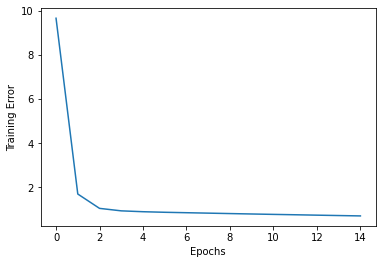

In [153]:
from keras.models import load_model
if os.path.exists('regression_model.h15'):
    model = load_model('regression_model.h15')
else:
    history = model.fit([train.userId, train.movieId], train.rating, epochs=15, verbose=2)
    model.save('regression_model.h15')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [154]:
score=model.evaluate([test.userId, test.movieId], test.rating,verbose=2)
print('accuracy:%0.2f%% ' %(100-score))

625/625 - 1s - loss: 0.8794 - 692ms/epoch - 1ms/step
accuracy:99.12% 


In [155]:
predictions1 = model.predict([test.userId.head(10), test.movieId.head(10)])

[print(predictions1[i], test.rating.iloc[i],test.movieId.iloc[i]) for i in range(0,10)]

[3.8281488] 4 381
[3.6614888] 3 602
[3.2479563] 4 431
[3.3591747] 2 875
[4.2035823] 2 182
[2.9056783] 3 1074
[3.796419] 5 286
[4.038604] 4 496
[3.2308545] 3 15
[2.9266953] 4 184


[None, None, None, None, None, None, None, None, None, None]

In [156]:

pred=model.predict([test.userId.head(20000), test.movieId.head(20000)])
predi=list(flatten(pred))
act=list(test.rating.head(20000))
print("model1")
print(len(predi),len(act))
print("Test set")
mse1 = sklearn.metrics.mean_squared_error(act, predi)
rmse1=  math.sqrt(mse1)
rscore1=r2_score(act, predi)
mae1=mae(act, predi)
print("mse=",mse1)
print("rmse=",rmse1)
print("rscore=",rscore1)
print("MAE=",mae1)


model1
20000 20000
Test set
mse= 0.8793660574585188
rmse= 0.9377451985792936
rscore= 0.303754753736428
MAE= 0.7318073098672263


In [157]:
pred=model.predict([train.userId.head(80000), train.movieId.head(80000)])
predi=list(flatten(pred))
act=list(train.rating.head(80000))
print("model1")
print(len(predi),len(act))
print("Train set")
mse = sklearn.metrics.mean_squared_error(act, predi)
rmse=  math.sqrt(mse)
rscore=r2_score(act, predi)
mae2=mae(act, predi)
print("mse=",mse)
print("rmse=",rmse)
print("rscore=",rscore)
print("MAE=",mae2)

model1
80000 80000
Train set
mse= 0.6501873151601028
rmse= 0.8063419343926637
rscore= 0.4872936822176829
MAE= 0.6291704831049778


In [158]:
lin

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,196,242,3,881250949,109771,10954
1,63,242,3,875747190,109771,10954
2,226,242,5,883888671,109771,10954
3,154,242,3,879138235,109771,10954
4,306,242,5,876503793,109771,10954
...,...,...,...,...,...,...
98080,747,1659,1,888733313,119338,125052
98081,916,1682,3,880845755,120382,37165
98082,840,1674,4,891211682,90329,9281
98083,655,1640,3,888474646,119326,28353


In [159]:
mov

,tmdbid,original_title
0,868,Tsotsi
1,7973,Caramel
2,159037,The Square
3,13688,CJ7
4,12207,Drunken Master II
...,...,...
4370,358451,A Tale of Three Cities
4371,44865,The Grandmaster
4372,2008,Wu Ji
4373,12289,Chi bi


In [160]:
rat

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [161]:
mov

,tmdbid,original_title
0,868,Tsotsi
1,7973,Caramel
2,159037,The Square
3,13688,CJ7
4,12207,Drunken Master II
...,...,...
4370,358451,A Tale of Three Cities
4371,44865,The Grandmaster
4372,2008,Wu Ji
4373,12289,Chi bi


In [162]:
mvc

,movieId,imdbId,tmdbid,title
0,242,109771,10954,Farinelli
1,302,110963,10452,La Reine Margot
2,377,111257,1637,Speed
3,51,109950,117164,Guardian Angel
4,346,106339,12635,Backbeat
...,...,...,...,...
1566,1659,119338,125052,Hurricane Streets
1567,1682,120382,37165,The Truman Show
1568,1674,90329,9281,Witness
1569,1640,119326,28353,How to Be a Player


In [163]:
#moid(movieId of the movie to which recommendation is to be done) is passed as parameter 
#returns the u_data(userId who had rated the movie) to rcmdrat
def getuser(moid):
    u_data=[]
    moid=int(moid)
    mid=rat[rat['movieId']==moid].movieId.tolist()
    uid=rat[rat['movieId']==moid].userId.tolist()
    for i in range(0,5):
      u_data.append(uid[i])
    return u_data

In [164]:
#u_data(userId who rated the movie) is passed as parameter
#returns m_data(random movieId of each user in u_data) and l(list of list of all the movieId rated by the udata)
def getmovie(udata):
  l=[]
  m_data=[]
  for i in range(len(udata)):
    mid=[]
    mid=rat[rat['userId']==udata[i]].movieId.tolist()
    l.append(mid)
  for i in l:
   random_x = random.choice(i)
   m_data.append(random_x)
  return m_data,l

In [165]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [166]:
def changety(predi):
  res=[]
  res1=[]
  pred = predi.tolist()
  for i in pred:
   x=np.round((i),decimals=0)
   x= x.astype(int)
   y = x.tolist()
   res.append(y)
  res1= flatten_list(res)
  return res1

In [167]:
def dupremov(test_list):
  res = []
  for i in test_list:
    if i not in res:
        res.append(i)
  return res

In [168]:
def getname(pred,li):
  movirat={}
  r=[]
  ratm_data=[]
  ratli=changety(pred)
  res= flatten_list(li)
  nodup=dupremov(res)
  for i in nodup:
    mid=rat[rat['movieId']==i].rating.tolist()
    movirat[i]=mid
  x=max(ratli)
  for i in movirat:
    for j in movirat[i]:
       if(j>=(x-1)):
         r.append(i)
  resrat=dupremov(r)
  ratm_data=random.sample(resrat,7)
  name=[]
  for i in ratm_data:
    if(i):
      a=mvc[mvc['movieId']==i].title
      name.append(a.to_string(index=False))
  return ratm_data,name

In [169]:
def rcmdrat(movie):
  try:
    match=new_mv[new_mv['title']==movie]
    match=match['movie_id'].to_string(index=False)
    if(pd.to_numeric(match)):
      user_data1=[]
      movie_data1=[]
      #get movieId of the movie
      mid = mvc[mvc['title']==movie].movieId 
      #get userId who had rated the movie
      user_data1=getuser(mid.to_string(index=False))
      #get random movieId from 
      #list of movies rated by users in u_data
      movie_data1,mlist=getmovie(user_data1)
      user_data = np.array(list(set(user_data1)))
      movie_data = np.array(list(set(movie_data1)))
      predictions = model.predict([user_data, movie_data])
      ratm,name=getname(predictions,mlist)
      for i in name:
        print(i)
  except:
    print("Can't find the movie!!")

In [170]:
rcmdrat('True Lies')

Blue in the Face
De eso no se habla
Apocalypse Now
Threesome
Dangerous Minds
All Dogs Go to Heaven 2
Wenecja


# OUTPUT

In [171]:
#input from user
name=input("Movie name?")

Movie name?Speed


In [172]:
rcmd_overview(name)

The Fast and the Furious
B-Girl
Blast from the Past
Hot Fuzz
Bang
Alexander and the Terrible, Horrible, No Good, Very Bad Day
Fear and Loathing in Las Vegas
The Black Dahlia
Last Vegas
A Thousand Words


In [173]:
rcmd_genkey(name)

Parker
Sherlock Holmes: A Game of Shadows
Cotton Comes to Harlem
The Losers
The Jackal
The Art of War
Lethal Weapon 4
16 Blocks
Quantum of Solace
Changing Lanes


In [174]:
rcmd_cast(name)

The Lake House
Premonition
47 Ronin
Two Weeks Notice
The Watcher
The Texas Chainsaw Massacre 2
The Replacements
The Proposal
The Net
The Last Time I Committed Suicide


In [175]:
rcmd_crew(name)

The Haunting
Speed 2: Cruise Control
Speed
Lara Croft Tomb Raider: The Cradle of Life
Tsotsi


In [176]:
rcmd_year(name)

Wyatt Earp
Wolf
True Lies
Timecop
The Specialist
The Shawshank Redemption
The Shadow
The Santa Clause
The River Wild
The Naked Gun 33⅓: The Final Insult


In [177]:
rcmd_lang(name)

Zoolander
Zookeeper
Zombieland
Zombie Hunter
Zodiac
ZMD: Zombies of Mass Destruction
Zipper
Zero Effect


In [178]:
rcmdrat(name)

Oliver & Company
The Deer Hunter
Of Human Bondage
New Jersey Drive
Diebinnen
Feeling Minnesota
Kim
